In [ ]:
KEYPOINT_DICT = {
        'nose': 0,
        'left_eye': 1,
        'right_eye': 2,
        'left_ear': 3,
        'right_ear': 4,
        'left_shoulder': 5,
        'right_shoulder': 6,
        'left_elbow': 7,
        'right_elbow': 8,
        'left_wrist': 9,
        'right_wrist': 10,
        'left_hip': 11,
        'right_hip': 12,
        'left_knee': 13,
        'right_knee': 14,
        'left_ankle': 15,
        'right_ankle': 16
    }

In [2]:
import scipy.io as sio

# data = sio.loadmat("data/FLIC/examples.mat")
data = sio.loadmat("data/FLIC-full/examples.mat")

print(data.keys())

examples = data["examples"]

dict_keys(['__header__', '__version__', '__globals__', 'examples'])


Trying: data\FLIC-full\images\12-oclock-high-special-edition-00004151.jpg
Exists: True


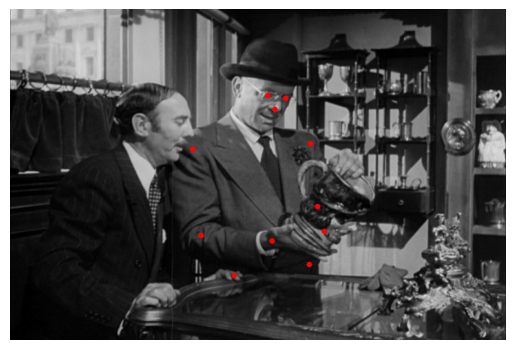

In [8]:
import os
import cv2
import matplotlib.pyplot as plt

ex = examples[0, 0]

# Decode filepath
fp = ex["filepath"][0]
if isinstance(fp, bytes):
    fp = fp.decode("utf-8")

# ALWAYS assume images live in images/
img_path = os.path.join("data", "FLIC-full", "images", fp)

print("Trying:", img_path)
print("Exists:", os.path.exists(img_path))

img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(img_path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

coords = ex["coords"]
for i in range(coords.shape[1]):
    x, y = coords[:, i]
    if x > 0 and y > 0:
        cv2.circle(img, (int(x), int(y)), 4, (255, 0, 0), -1)

plt.imshow(img)
plt.axis("off")
plt.show()
